In [2]:
# for QR codes use inline
# %matplotlib inline
# qr_setting = 'url'
# qrviz_setting = 'show'
#
# for lecture use notebook
%matplotlib inline
qr_setting = None
#
%config InlineBackend.figure_format='retina'
# import libraries
import numpy as np
import matplotlib as mp
import pandas as pd
import matplotlib.pyplot as plt
import laUtilities as ut
import slideUtilities as sl
import demoUtilities as dm
import pandas as pd
from importlib import reload
from datetime import datetime
from IPython.display import Image
from IPython.display import display_html
from IPython.display import display
from IPython.display import Math
from IPython.display import Latex
from IPython.display import HTML;

# Orthogonal Sets

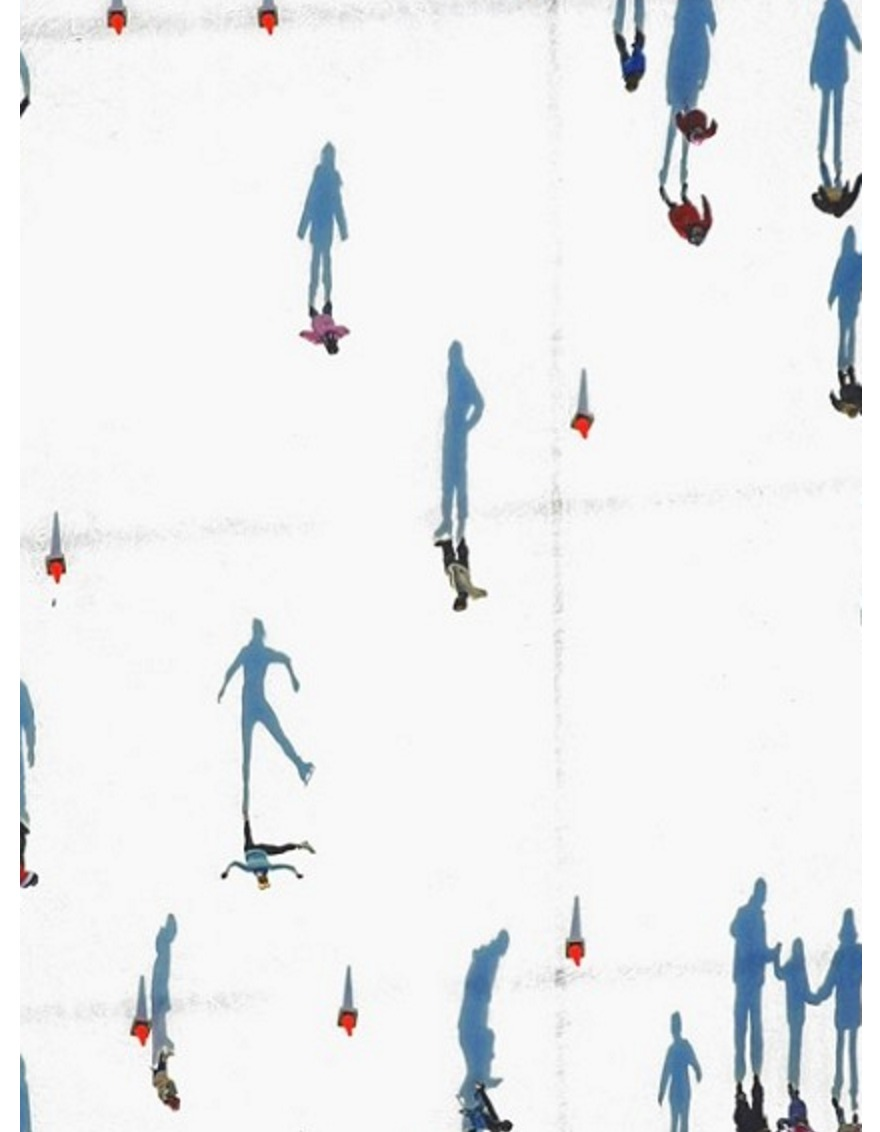

In [2]:
# image from NYT - https://www.nytimes.com/store/me-38-my-human-2004-nsap364p.html
display(Image("images/skaters.jpg", width=350))

Today we deepen our study of geometry.

In the last lecture we focused on points, lines, and angles.

Today we take on more challenging geometric notions that bring in __sets of vectors__ and __subspaces__.

Within this realm, we will focus on __orthogonality__ and a new notion called __projection.__   


First of all, today we'll study the properties of __sets__ of orthogonal vectors.   

These can be very useful.

## Orthogonal Sets

A set of vectors $\{\mathbf{u}_1,\dots,\mathbf{u}_p\}$ in $\mathbb{R}^n$ is said to be an __orthogonal set__ if each pair of distinct vectors from the set is orthogonal, i.e.,

$$\mathbf{u}_i^T\mathbf{u}_j = 0\;\;\mbox{whenever}\;i\neq j.$$

__Example.__  Show that $\{\mathbf{u}_1,\mathbf{u}_2,\mathbf{u}_3\}$ is an orthogonal set, where

$$ \mathbf{u}_1 = \begin{bmatrix}3\\1\\1\end{bmatrix},\;\;\mathbf{u}_2=\begin{bmatrix}-1\\2\\1\end{bmatrix},\;\;\mathbf{u}_3=\begin{bmatrix}-1/2\\-2\\7/2\end{bmatrix}.$$

__Solution.__ Consider the three possible pairs of distinct vectors, namely, $\{\mathbf{u}_1,\mathbf{u}_2\}, \{\mathbf{u}_1,\mathbf{u}_3\},$ and $\{\mathbf{u}_2,\mathbf{u}_3\}.$

$$ \mathbf{u}_1^T\mathbf{u}_2 = 3(-1) + 1(2) + 1(1) = 0$$

$$ \mathbf{u}_1^T\mathbf{u}_3 = 3(-1/2) + 1(-2) + 1(7/2) = 0$$

$$ \mathbf{u}_2^T\mathbf{u}_3 = -1(-1/2) + 2(-2) + 1(7/2) = 0$$

Each pair of distinct vectors is orthogonal, and so $\{\mathbf{u}_1,\mathbf{u}_2, \mathbf{u}_3\}$ is an orthogonal set.  

In three space they describe three lines that say are __mutually perpendicular.__

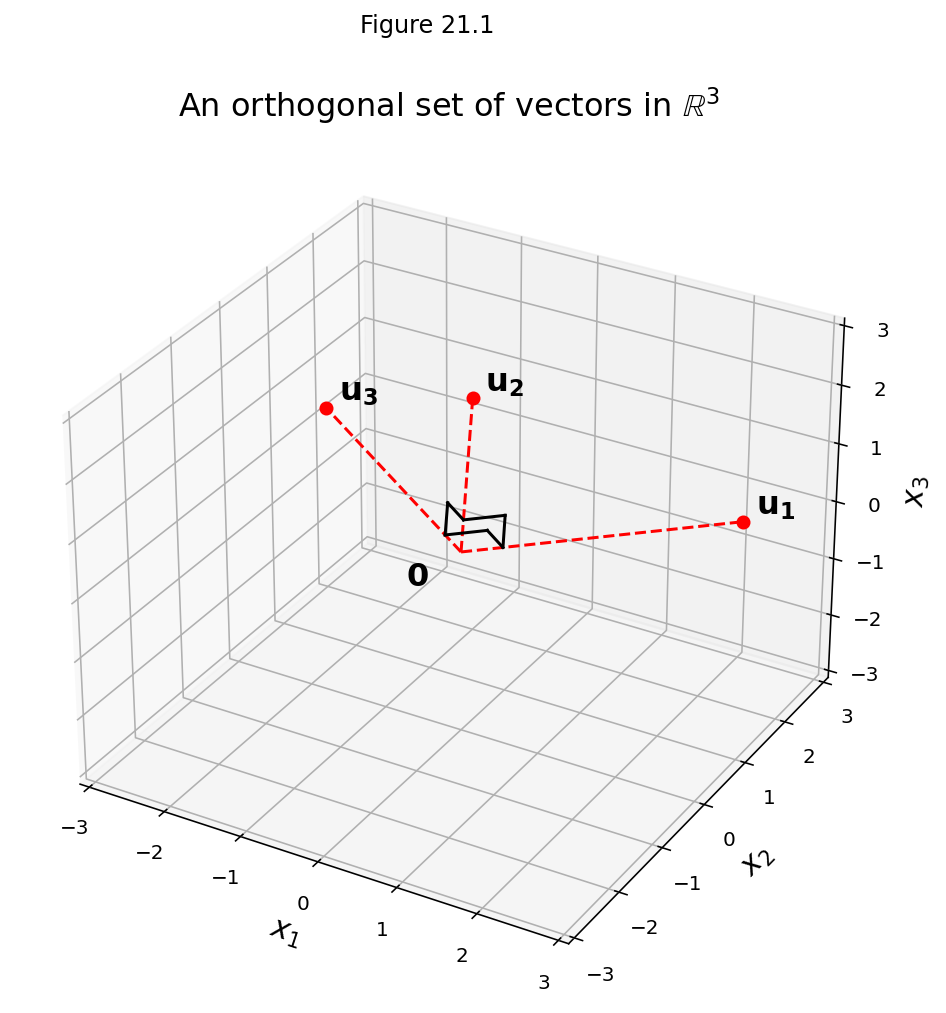

In [8]:
fig = ut.three_d_figure((21, 1), fig_desc = 'An orthogonal set of vectors',
                        xmin = -3, xmax = 3, ymin = -3, ymax = 3, zmin = -3, zmax = 3, 
                        figsize = (12, 8), qr = qr_setting)
u1 = np.array([3, 1, 1])
u2 = np.array([-1, 2, 1])
u3 = np.array([-1/2, -2, 7/2])
origin = np.array([0, 0, 0])
fig.plotLine([origin, u1], 'r', '--')
fig.plotPoint(u1[0], u1[1], u1[2], 'r')
fig.text(u1[0]+.1, u1[1]+.1, u1[2]+.1, r'$\bf u_1$', 'u1', size=16, color='k')
fig.plotLine([origin, u2], 'r', '--')
fig.plotPoint(u2[0], u2[1], u2[2], 'r')
fig.text(u2[0]+.1, u2[1]+.1, u2[2]+.1, r'$\bf u_2$', 'u2', size=16, color='k')
fig.plotLine([origin, u3], 'r', '--')
fig.plotPoint(u3[0], u3[1], u3[2], 'r')
fig.text(u3[0]+.1, u3[1]+.1, u3[2]+.1, r'$\bf u_3$', 'u3', size=16, color = 'k')
fig.text(origin[0]-.45, origin[1]-.45, origin[2]-.45, r'$\bf 0$', 0, size = 16)
fig.plotPerpSym(origin, u1, u2, 0.5)
fig.plotPerpSym(origin, u3, u2, 0.5)
fig.plotPerpSym(origin, u3, u1, 0.5)
fig.set_title(r'An orthogonal set of vectors in $\mathbb{R}^3$', 'An orthogonal set of vectors in R3', size = 16)
fig.save();

``` {toggle}
Question Time! Q21.1
```

__Theorem.__  If $S = \{\mathbf{u}_1,\dots,\mathbf{u}_p\}$ is an orthogonal set of nonzero vectors in $\mathbb{R}^n,$ then $S$ is linearly independent and hence is a basis for the subspace spanned by $S$.

__Proof.__  We will prove that there is no linear combination of the vectors in $S$ with nonzero coefficients that yields the zero vector.

Our proof strategy will be: 

we will show that for any linear combination of the vectors in $S$, if the combination is the zero vector, then all coefficients of the combination must be zero.

Specifically:

Assume ${\bf 0} = c_1\mathbf{u}_1 + \dots + c_p\mathbf{u}_p$ for some scalars $c_1,\dots,c_p$.  Then:

$${\bf 0} = c_1\mathbf{u}_1 + c_2\mathbf{u}_2 + \dots + c_p\mathbf{u}_p$$

$$0 = (c_1\mathbf{u}_1 + c_2\mathbf{u}_2 + \dots + c_p\mathbf{u}_p)^T\mathbf{u}_1$$

$$ = (c_1\mathbf{u}_1)^T\mathbf{u}_1 + (c_2\mathbf{u}_2)^T\mathbf{u}_1 \dots + (c_p\mathbf{u}_p)^T\mathbf{u}_1$$

$$ = c_1(\mathbf{u}_1^T\mathbf{u}_1) + c_2(\mathbf{u}_2^T\mathbf{u}_1) + \dots + c_p(\mathbf{u}_p^T\mathbf{u}_1)$$

Because $\mathbf{u}_1$ is orthogonal to $\mathbf{u}_2,\dots,\mathbf{u}_p$:

$$ = c_1(\mathbf{u}_1^T\mathbf{u}_1) $$

Since $\mathbf{u}_1$ is nonzero, $\mathbf{u}_1^T\mathbf{u}_1$ is not zero and so $c_1 = 0$.  

We can use the same kind of reasoning to show that, $c_2,\dots,c_p$ must be zero.

In other words, there is no nonzero combination of $\mathbf{u}_i$'s that yields the zero vector --so $S$ is linearly independent.

__Definition.__ An __orthogonal basis__ for a subspace $W$ of $\mathbb{R}^n$ is a basis for $W$ that is also an orthogonal set.

We have seen that for any subspace, there may be many different sets of vectors that can serve as a basis for $W$.

However an orthogonal basis is a particularly nice basis, because the weights (coordinates) of any point can be computed easily.

__Theorem.__ Let $\{\mathbf{u}_1,\dots,\mathbf{u}_p\}$ be an orthogonal basis for a subspace $W$ of $\mathbb{R}^n$.  For each $\mathbf{y}$ in $W,$ the weights of the linear combination

$$\mathbf{y} = c_1\mathbf{u}_1 + \dots + c_p\mathbf{u}_p$$

are given by 

$$c_j = \frac{\mathbf{y}^T\mathbf{u}_j}{\mathbf{u}_j^T\mathbf{u}_j}\;\;\;j = 1,\dots,p$$


__Proof.__  As we saw in the last proof, the orthogonality of $\{\mathbf{u}_1,\dots,\mathbf{u}_p\}$ means that

$$\mathbf{y}^T\mathbf{u}_1 = (c_1\mathbf{u}_1 + c_1\mathbf{u}_2 + \dots + c_p\mathbf{u}_p)^T\mathbf{u}_1$$

$$=c_1(\mathbf{u}_1^T\mathbf{u}_1)$$

Since $\mathbf{u}_1^T\mathbf{u}_1$ is not zero, the equation above can be solved for $c_1.$   To find any other $c_j,$ compute $\mathbf{y}^T\mathbf{u}_j$ and solve for $c_j$.

__Example.__  The set $S$ which we saw earlier, ie,

$$ \mathbf{u}_1 = \begin{bmatrix}3\\1\\1\end{bmatrix},\;\;\mathbf{u}_2=\begin{bmatrix}-1\\2\\1\end{bmatrix},\;\;\mathbf{u}_3=\begin{bmatrix}-1/2\\-2\\7/2\end{bmatrix},$$

is an orthogonal basis for $\mathbb{R}^3.$

Then, express the vector $\mathbf{y} = \begin{bmatrix}6\\1\\-8\end{bmatrix}$ as a linear combination of the vectors in $S$ (ie, in the basis $S$ or in the coordinate system $S$).

__Solution.__  Compute

$$\mathbf{y}^T\mathbf{u}_1 = 11,\;\;\;\mathbf{y}^T\mathbf{u}_2 = -12,\;\;\;\mathbf{y}^T\mathbf{u}_3 = -33,$$

$$\mathbf{u}_1^T\mathbf{u}_1 = 11,\;\;\;\mathbf{u}_2^T\mathbf{u}_2 = 6,\;\;\;\mathbf{u}_3^T\mathbf{u}_3 = 33/2$$

So 

$$\mathbf{y} = \frac{\mathbf{y}^T\mathbf{u}_1}{\mathbf{u}_1^T\mathbf{u}_1}\mathbf{u}_1 + \frac{\mathbf{y}^T\mathbf{u}_2}{\mathbf{u}_2^T\mathbf{u}_2}\mathbf{u}_2 + \frac{\mathbf{y}^T\mathbf{u}_3}{\mathbf{u}_3^T\mathbf{u}_3}\mathbf{u}_3$$

$$ = \frac{11}{11}\mathbf{u}_1 + \frac{-12}{6}\mathbf{u}_2 + \frac{-33}{33/2}\mathbf{u}_3$$

$$ = \mathbf{u}_1 - 2\mathbf{u}_2 - 2 \mathbf{u}_3.$$

Let's stop for a moment and think about how we would have done this if we had not known that the vectors $\mathbf{u}_1, \mathbf{u}_2,$ and $\mathbf{u}_3$ form an orthogonal set.

We would have been looking for 

$$c_1 \mathbf{u}_1 + c_2\mathbf{u}_2 + c_3\mathbf{u}_3 = \mathbf{y}$$

The way we would find $c_1, c_2, c_3$ in that case would be to solve the linear system

$$[\mathbf{u}_1 \;\mathbf{u}_2 \;\mathbf{u}_3]\begin{bmatrix}c_1\\c_2\\c_3\end{bmatrix} = \mathbf{y}$$

which would have been much more trouble than what we did.

Instead, because the basis is an orthogonal basis, each coefficient $c_1$ can be found separately, and simply.

## An Orthogonal Projection

Given a nonzero vector $\mathbf{u}$ in $\mathbb{R}^n,$ consider the problem of decomposing a vector $\mathbf{y}$ in $\mathbb{R}^n$ into the sum of two vectors:

* one that is a multiple of $\mathbf{u}$, and
* one that is orthogonal to $\mathbf{u}.$

In other words, we wish to write:

$$\mathbf{y} = \hat{\mathbf{y}} + \mathbf{z}$$

where $\hat{\mathbf{y}} = \alpha\mathbf{u}$ for some scalar $\alpha$ and $\mathbf{z}$ is some vector orthogonal to $\mathbf{u}.$

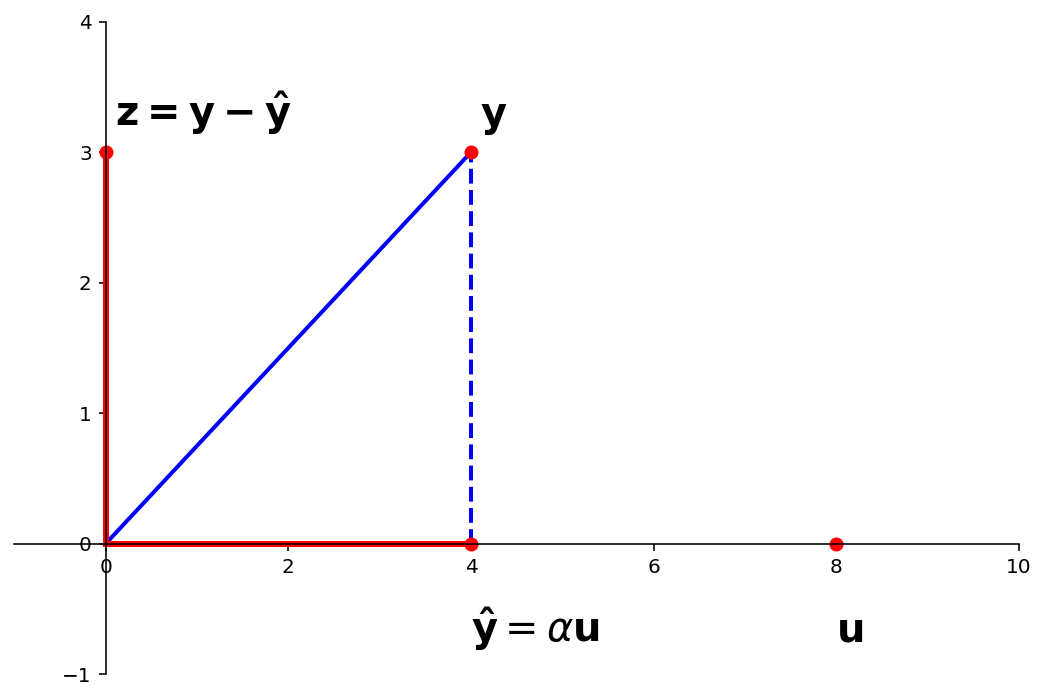

In [16]:
sl.hide_code_in_slideshow()
ax = ut.plotSetup(-1,10,-1,4,(9,6))
ut.centerAxes(ax)
pt = [4., 3.]
plt.plot([0,pt[0]],[0,pt[1]],'b-',lw=2)
plt.plot([pt[0],pt[0]],[0,pt[1]],'b--',lw=2)
plt.plot([0,pt[0]],[0,0],'r-',lw=3)
plt.plot([0,0],[0,pt[1]],'r-',lw=3)
ut.plotVec(ax,pt)
u = np.array([pt[0],0])
v = [0,pt[1]]
ut.plotVec(ax,u)
ut.plotVec(ax,2*u)
ut.plotVec(ax,v)
ax.text(pt[0],-0.75,r'${\bf \hat{y}}=\alpha{\bf u}$',size=20)
ax.text(2*pt[0],-0.75,r'$\mathbf{u}$',size=20)
ax.text(pt[0]+0.1,pt[1]+0.2,r'$\mathbf{y}$',size=20)
ax.text(0+0.1,pt[1]+0.2,r'$\mathbf{z = y -\hat{y}}$',size=20);

That is, we are given $\mathbf{y}$ and $\mathbf{u}$, and asked to compute $\mathbf{z}$ and $\hat{\mathbf{y}}.$

To solve this, assume that we have some $\alpha$, and with it we compute $\mathbf{y} - \alpha\mathbf{u} = \mathbf{y}-\hat{\mathbf{y}} = \mathbf{z}.$

We want $\mathbf{z}$ to be orthogonal to $\mathbf{u}.$

Now $\mathbf{z} = \mathbf{y} - \alpha{\mathbf{u}}$ is orthogonal to $\mathbf{u}$ if and only if

$$0 = (\mathbf{y} - \alpha\mathbf{u})^T\mathbf{u}$$

$$ = \mathbf{y}^T\mathbf{u} - (\alpha\mathbf{u})^T\mathbf{u}$$

$$ = \mathbf{y}^T\mathbf{u} - \alpha(\mathbf{u}^T\mathbf{u})$$

That is, the solution in which $\mathbf{z}$ is orthogonal to $\mathbf{u}$ happens if and only if 

$$\alpha = \frac{\mathbf{y}^T\mathbf{u}}{\mathbf{u}^T\mathbf{u}}$$

and since $\hat{\mathbf{y}} = \alpha\mathbf{u}$,

$$\hat{\mathbf{y}} = \frac{\mathbf{y}^T\mathbf{u}}{\mathbf{u}^T\mathbf{u}}\mathbf{u}.$$

The vector $\hat{\mathbf{y}}$ is called the __orthogonal projection of $\mathbf{y}$ onto $\mathbf{u}$,__ and the vector $\mathbf{z}$ is called the __component of $\mathbf{y}$ orthogonal to $\mathbf{u}.$__

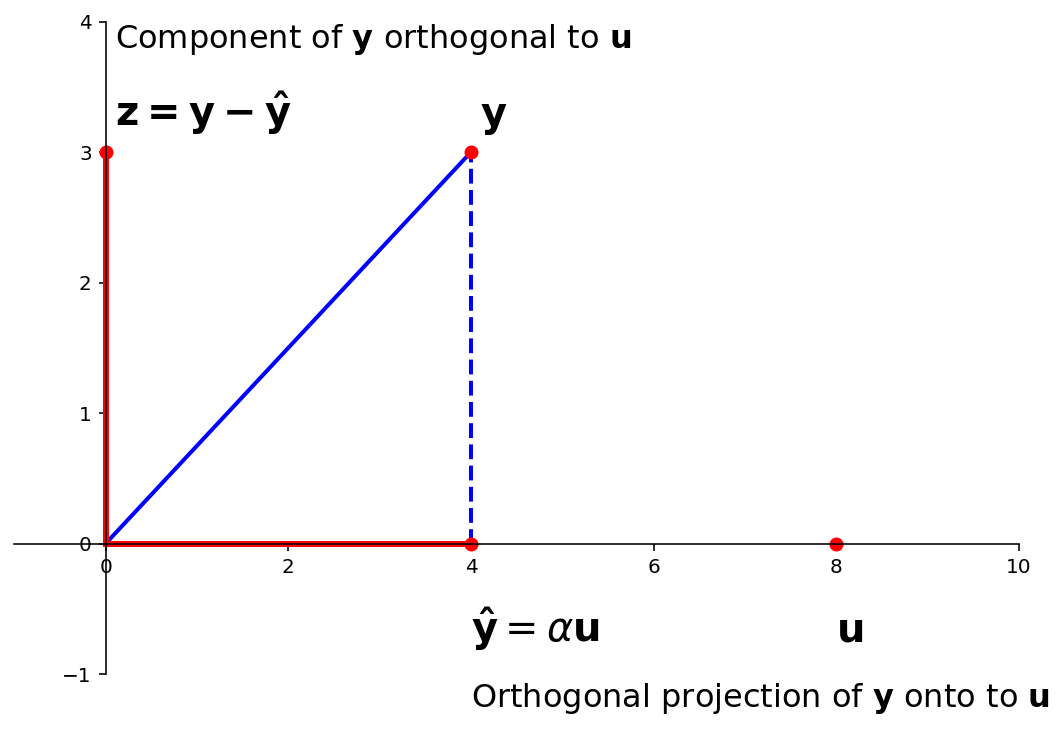

In [15]:
sl.hide_code_in_slideshow()
ax = ut.plotSetup(-1,10,-1,4,(9,6))
ut.centerAxes(ax)
pt = [4., 3.]
plt.plot([0,pt[0]],[0,pt[1]],'b-',lw=2)
plt.plot([pt[0],pt[0]],[0,pt[1]],'b--',lw=2)
plt.plot([0,pt[0]],[0,0],'r-',lw=3)
plt.plot([0,0],[0,pt[1]],'r-',lw=3)
ut.plotVec(ax,pt)
u = np.array([pt[0],0])
v = [0,pt[1]]
ut.plotVec(ax,u)
ut.plotVec(ax,2*u)
ut.plotVec(ax,v)
ax.text(pt[0],-0.75,r'${\bf \hat{y}}=\alpha{\bf u}$',size=20)
ax.text(2*pt[0],-0.75,r'$\mathbf{u}$',size=20)
ax.text(pt[0]+0.1,pt[1]+0.2,r'$\mathbf{y}$',size=20)
ax.text(0+0.1,pt[1]+0.2,r'$\mathbf{z = y -\hat{y}}$',size=20)
ax.text(0+0.1,pt[1]+0.8,r'Component of $\mathbf{y}$ orthogonal to $\mathbf{u}$',size=16)
ax.text(pt[0],-1.25,r'Orthogonal projection of $\mathbf{y}$ onto to $\mathbf{u}$',size=16);

Now, note that if we had scaled $\mathbf{u}$ by any amount (ie, moved it to the right or the left), we would not have changed the location of $\hat{\mathbf{y}}.$  

This can be seen as well by replacing $\mathbf{u}$ with $c\mathbf{u}$ and recomputing $\hat{\mathbf{y}}$:

$$\hat{\mathbf{y}} = \frac{\mathbf{y}^Tc\mathbf{u}}{c\mathbf{u}^Tc\mathbf{u}}c\mathbf{u} = \frac{\mathbf{y}^T\mathbf{u}}{\mathbf{u}^T\mathbf{u}}\mathbf{u}.$$

Thus, the projection of $\mathbf{y}$ is determined by the _subspace_ $L$ that is spanned by $\mathbf{u}$ -- in other words, the line through $\mathbf{u}$ and the origin.

Hence sometimes $\hat{\mathbf{y}}$ is denoted by $\mbox{proj}_L \mathbf{y}$ and is called the __orthogonal projection of $\mathbf{y}$ onto $L$.__

Specifically:

$$\hat{\mathbf{y}} = \mbox{proj}_L \mathbf{y} = \frac{\mathbf{y}^T\mathbf{u}}{\mathbf{u}^T\mathbf{u}}\mathbf{u}$$

__Example.__  Let $\mathbf{y} = \begin{bmatrix}7\\6\end{bmatrix}$ and $\mathbf{u} = \begin{bmatrix}4\\2\end{bmatrix}.$  

Find the orthogonal projection of $\mathbf{y}$ onto $\mathbf{u}.$  Then write $\mathbf{y}$ as the sum of two orthogonal vectors, one in Span$\{\mathbf{u}\}$, and one orthogonal to $\mathbf{u}.$

__Solution.__  Compute

$$\mathbf{y}^T\mathbf{u} = \begin{bmatrix}7&6\end{bmatrix}\begin{bmatrix}4\\2\end{bmatrix} = 40$$

$$\mathbf{u}^T\mathbf{u} = \begin{bmatrix}4&2\end{bmatrix}\begin{bmatrix}4\\2\end{bmatrix} = 20$$

The orthogonal projection of $\mathbf{y}$ onto $\mathbf{u}$ is

$$\hat{\mathbf{y}} = \frac{\mathbf{y}^T\mathbf{u}}{\mathbf{u}^T\mathbf{u}} \mathbf{u}$$

$$=\frac{40}{20}\mathbf{u} = 2\begin{bmatrix}4\\2\end{bmatrix} = \begin{bmatrix}8\\4\end{bmatrix}$$

And the component of $\mathbf{y}$ orthogonal to $\mathbf{u}$ is

$$\mathbf{y}-\hat{\mathbf{y}} = \begin{bmatrix}7\\6\end{bmatrix} - \begin{bmatrix}8\\4\end{bmatrix} = \begin{bmatrix}-1\\2\end{bmatrix}.$$

So 

$$\mathbf{y} = \hat{\mathbf{y}} + \mathbf{z}$$

$$\begin{bmatrix}7\\6\end{bmatrix} = \begin{bmatrix}8\\4\end{bmatrix} + \begin{bmatrix}-1\\2\end{bmatrix}.$$

<IPython.core.display.Javascript object>


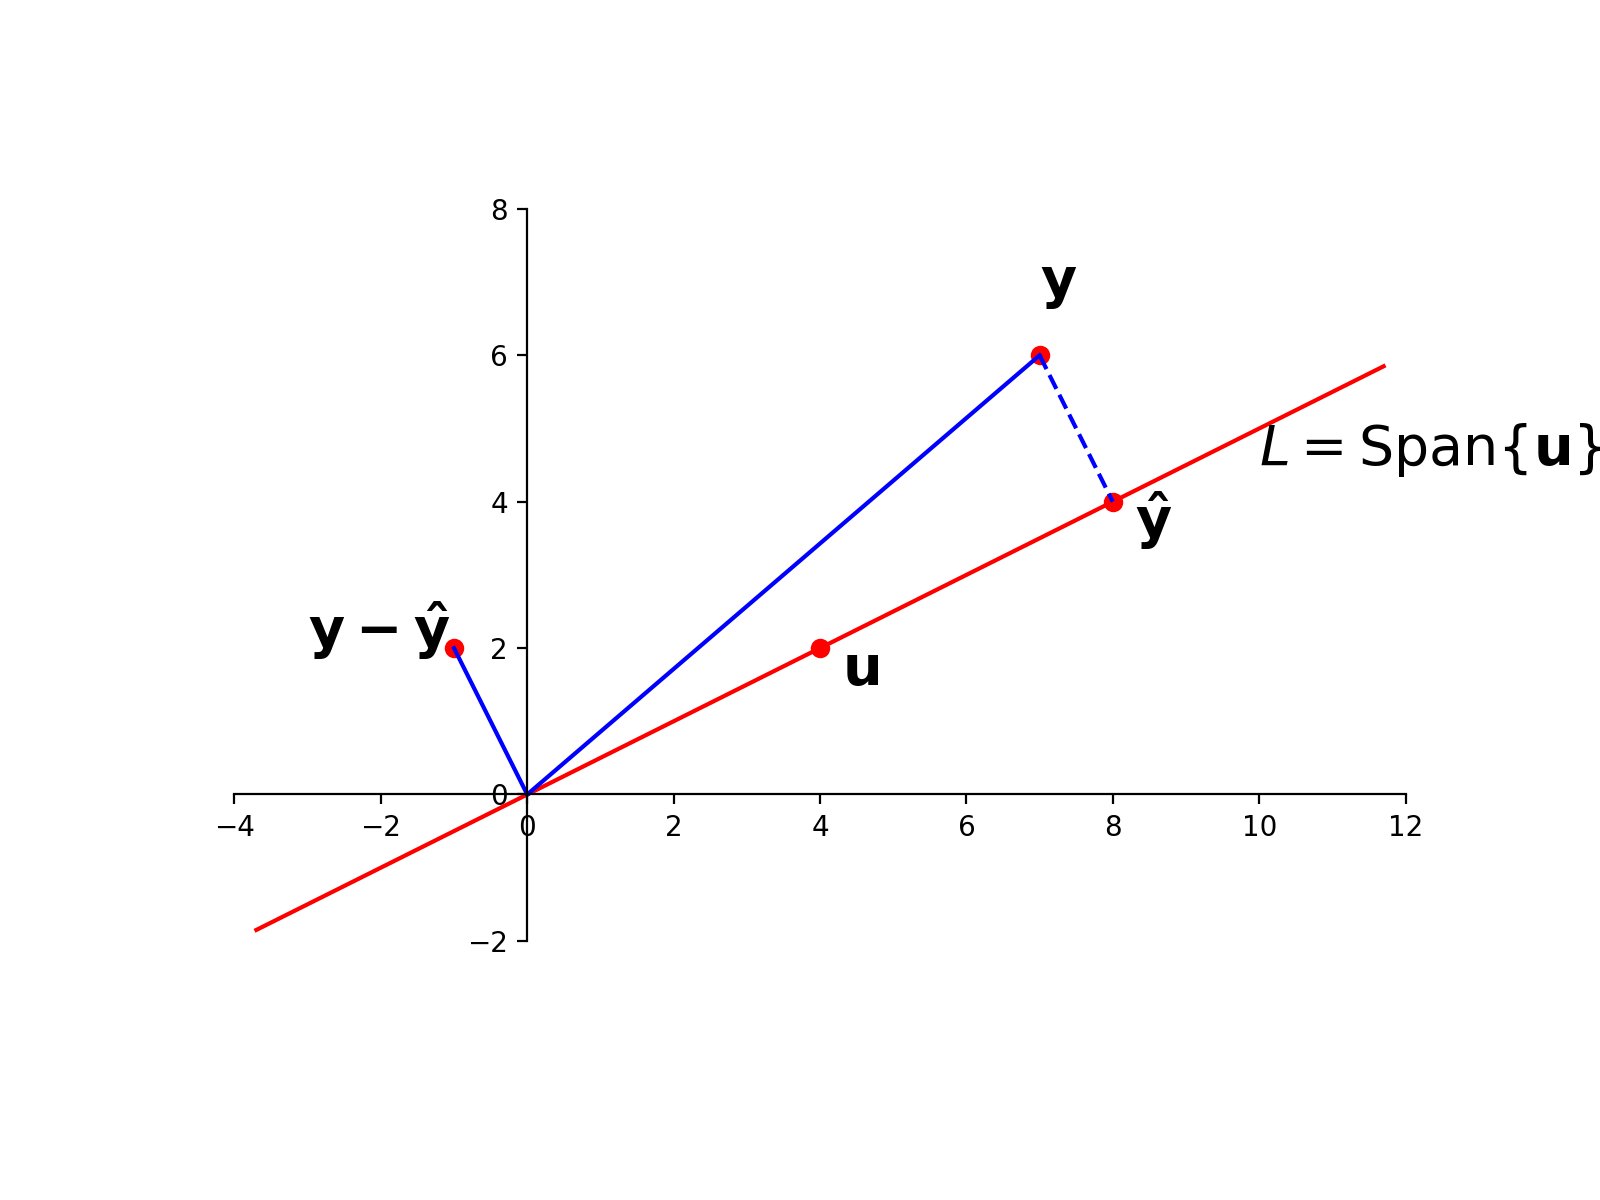

In [6]:
ax = ut.plotSetup(-3,11,-1,7,(8,6))
ut.centerAxes(ax)
plt.axis('equal')
u = np.array([4.,2])
y = np.array([7.,6])
yhat = (y.T.dot(u)/u.T.dot(u))*u
z = y-yhat
ut.plotLinEqn(1.,-2.,0.)
ut.plotVec(ax,u)
ut.plotVec(ax,z)
ut.plotVec(ax,y)
ut.plotVec(ax,yhat)
ax.text(u[0]+0.3,u[1]-0.5,r'$\mathbf{u}$',size=20)
ax.text(yhat[0]+0.3,yhat[1]-0.5,r'$\mathbf{\hat{y}}$',size=20)
ax.text(y[0],y[1]+0.8,r'$\mathbf{y}$',size=20)
ax.text(z[0]-2,z[1],r'$\mathbf{y - \hat{y}}$',size=20)
ax.text(10,4.5,r'$L = $Span$\{\mathbf{u}\}$',size=20)
ax.plot([y[0],yhat[0]],[y[1],yhat[1]],'b--')
ax.plot([0,y[0]],[0,y[1]],'b-')
ax.plot([0,z[0]],[0,z[1]],'b-');

``` {toggle}
Question Time! Q21.2
```

<IPython.core.display.Javascript object>


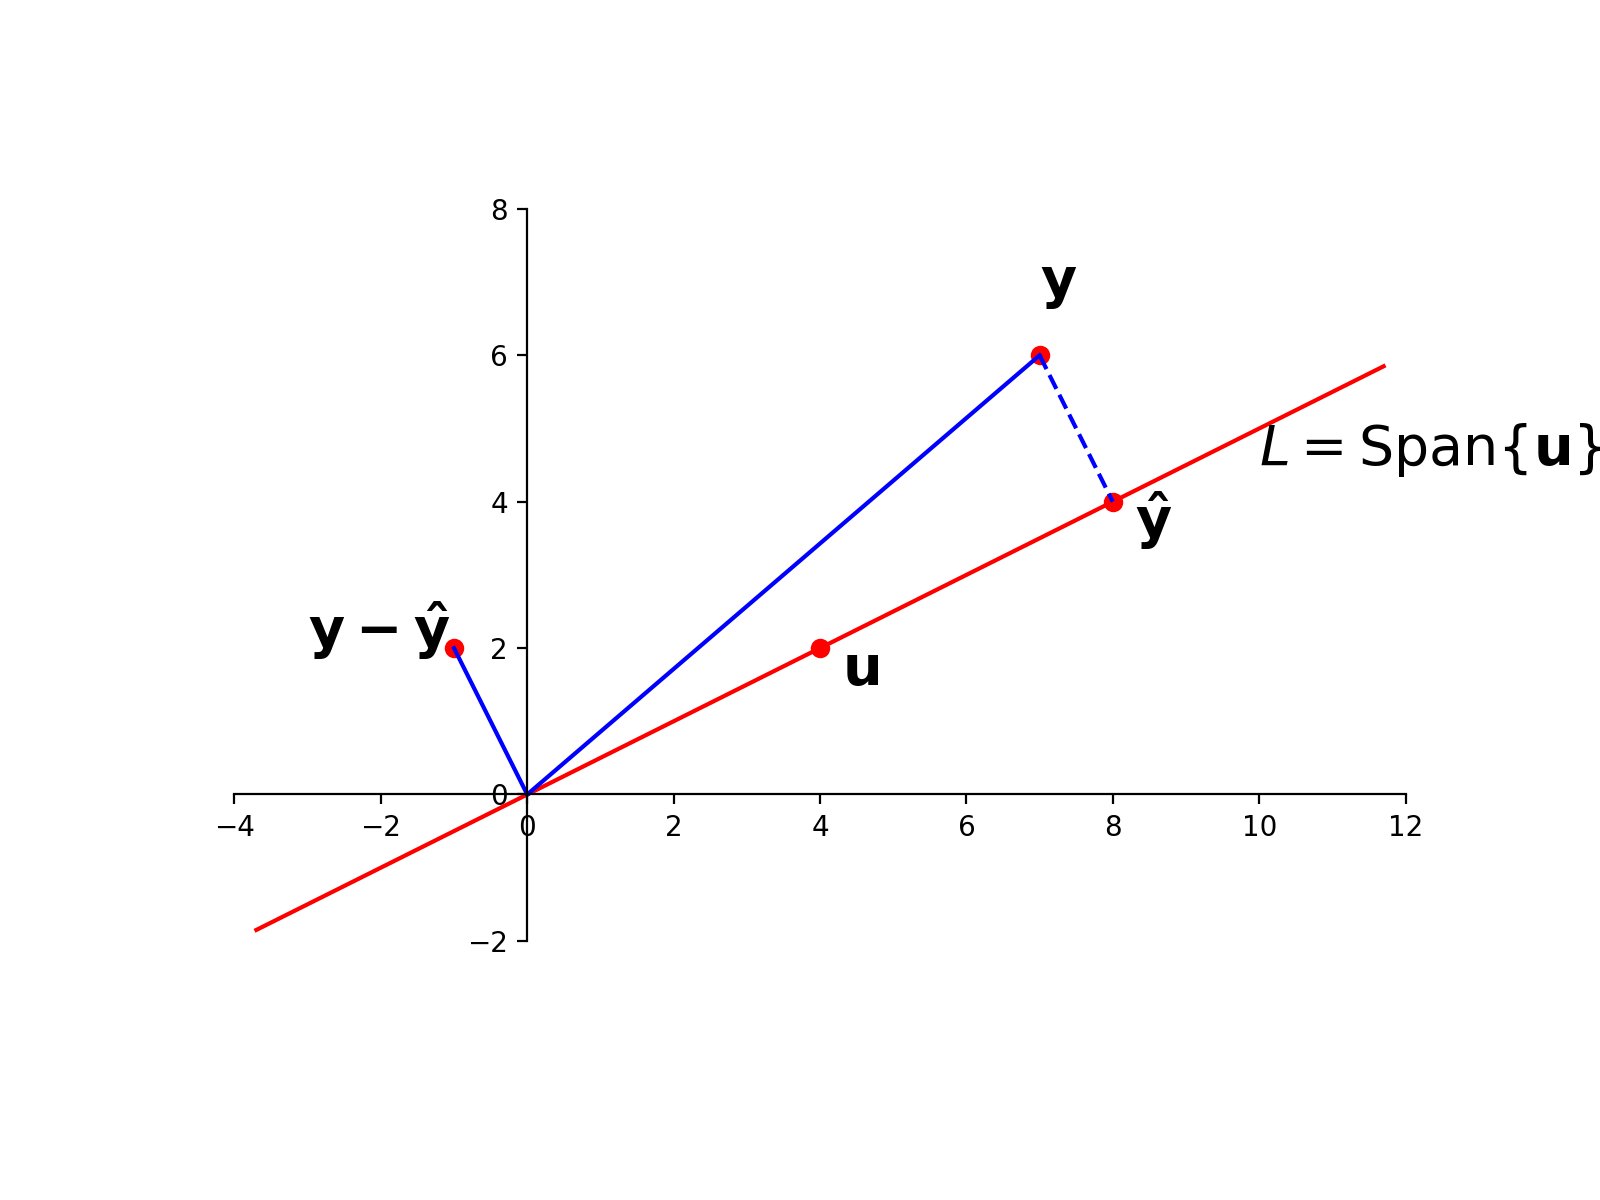

In [7]:
ax = ut.plotSetup(-3,11,-1,7,(8,6))
ut.centerAxes(ax)
plt.axis('equal')
u = np.array([4.,2])
y = np.array([7.,6])
yhat = (y.T.dot(u)/u.T.dot(u))*u
z = y-yhat
ut.plotLinEqn(1.,-2.,0.)
ut.plotVec(ax,u)
ut.plotVec(ax,z)
ut.plotVec(ax,y)
ut.plotVec(ax,yhat)
ax.text(u[0]+0.3,u[1]-0.5,r'$\mathbf{u}$',size=20)
ax.text(yhat[0]+0.3,yhat[1]-0.5,r'$\mathbf{\hat{y}}$',size=20)
ax.text(y[0],y[1]+0.8,r'$\mathbf{y}$',size=20)
ax.text(z[0]-2,z[1],r'$\mathbf{y - \hat{y}}$',size=20)
ax.text(10,4.5,r'$L = $Span$\{\mathbf{u}\}$',size=20)
ax.plot([y[0],yhat[0]],[y[1],yhat[1]],'b--')
ax.plot([0,y[0]],[0,y[1]],'b-')
ax.plot([0,z[0]],[0,z[1]],'b-');

__The closest point.__

Recall from geometry that given a line and a point $P$, the closest point on the line to $P$ is given by the perpendicular from $P$ to the line.

So this gives an important interpretation of $\hat{\mathbf{y}}$: it is __the closest point to $\mathbf{y}$ in the subspace $L$.__

__The distance from $\mathbf{y}$ to $L$__

The distance from $\mathbf{y}$ to $L$ is the length of the perpendicular from $\mathbf{y}$ to its orthogonal projection on $L$, namely $\hat{\mathbf{y}}$.

This distance equals the length of $\mathbf{y} - \hat{\mathbf{y}}$.

In this example, the distance is 

$$\Vert\mathbf{y}-\hat{\mathbf{y}}\Vert = \sqrt{(-1)^2 + 2^2} = \sqrt{5}.$$

## A Geometric Interpretation

Earlier today, we saw that when we decompose a vector $\mathbf{y}$ into a linear combination of vectors $\{\mathbf{u}_1,\dots,\mathbf{u}_p\}$ in a orthogonal set, we have

$$\mathbf{y} = c_1\mathbf{u}_1 + \dots + c_p\mathbf{u}_p$$

where

$$c_j = \frac{\mathbf{y}^T\mathbf{u}_j}{\mathbf{u}_j^T\mathbf{u}_j}$$

And just now we have seen that the projection of $\mathbf{y}$ onto the subspace spanned by $\mathbf{u}$ is

$$\mbox{proj}_L \mathbf{y} = \frac{\mathbf{y}^T\mathbf{u}}{\mathbf{u}^T\mathbf{u}}\mathbf{u}.$$

So a decomposition like $\mathbf{y} = c_1\mathbf{u}_1 + \dots + c_p\mathbf{u}_p$ is really decomposing $\mathbf{y}$ into __a sum of orthogonal projections onto one-dimensional subspaces.__

For example, let's take the case where $\mathbf{y} \in \mathbb{R}^2.$   Let's say we are given $\mathbf{u}_1, \mathbf{u}_2$ such that $\mathbf{u}_1$ is orthogonal to $\mathbf{u}_2$, and so together they span $\mathbb{R}^2.$

Then $\mathbf{y}$ can be written in the form

$$\mathbf{y} = \frac{\mathbf{y}^T\mathbf{u}_1}{\mathbf{u}_1^T\mathbf{u}_1}\mathbf{u}_1 +  \frac{\mathbf{y}^T\mathbf{u}_2}{\mathbf{u}_2^T\mathbf{u}_2}\mathbf{u}_2.$$

The first term is the projection of $\mathbf{y}$ onto the subspace spanned by $\mathbf{u}_1$ and the second term is the projection of $\mathbf{y}$ onto the subspace spanned by $\mathbf{u}_2.$  

So this equation expresses $\mathbf{y}$ as the sum of its projections onto the (orthogonal) axes determined by $\mathbf{u}_1$ and $\mathbf{u}_2$.

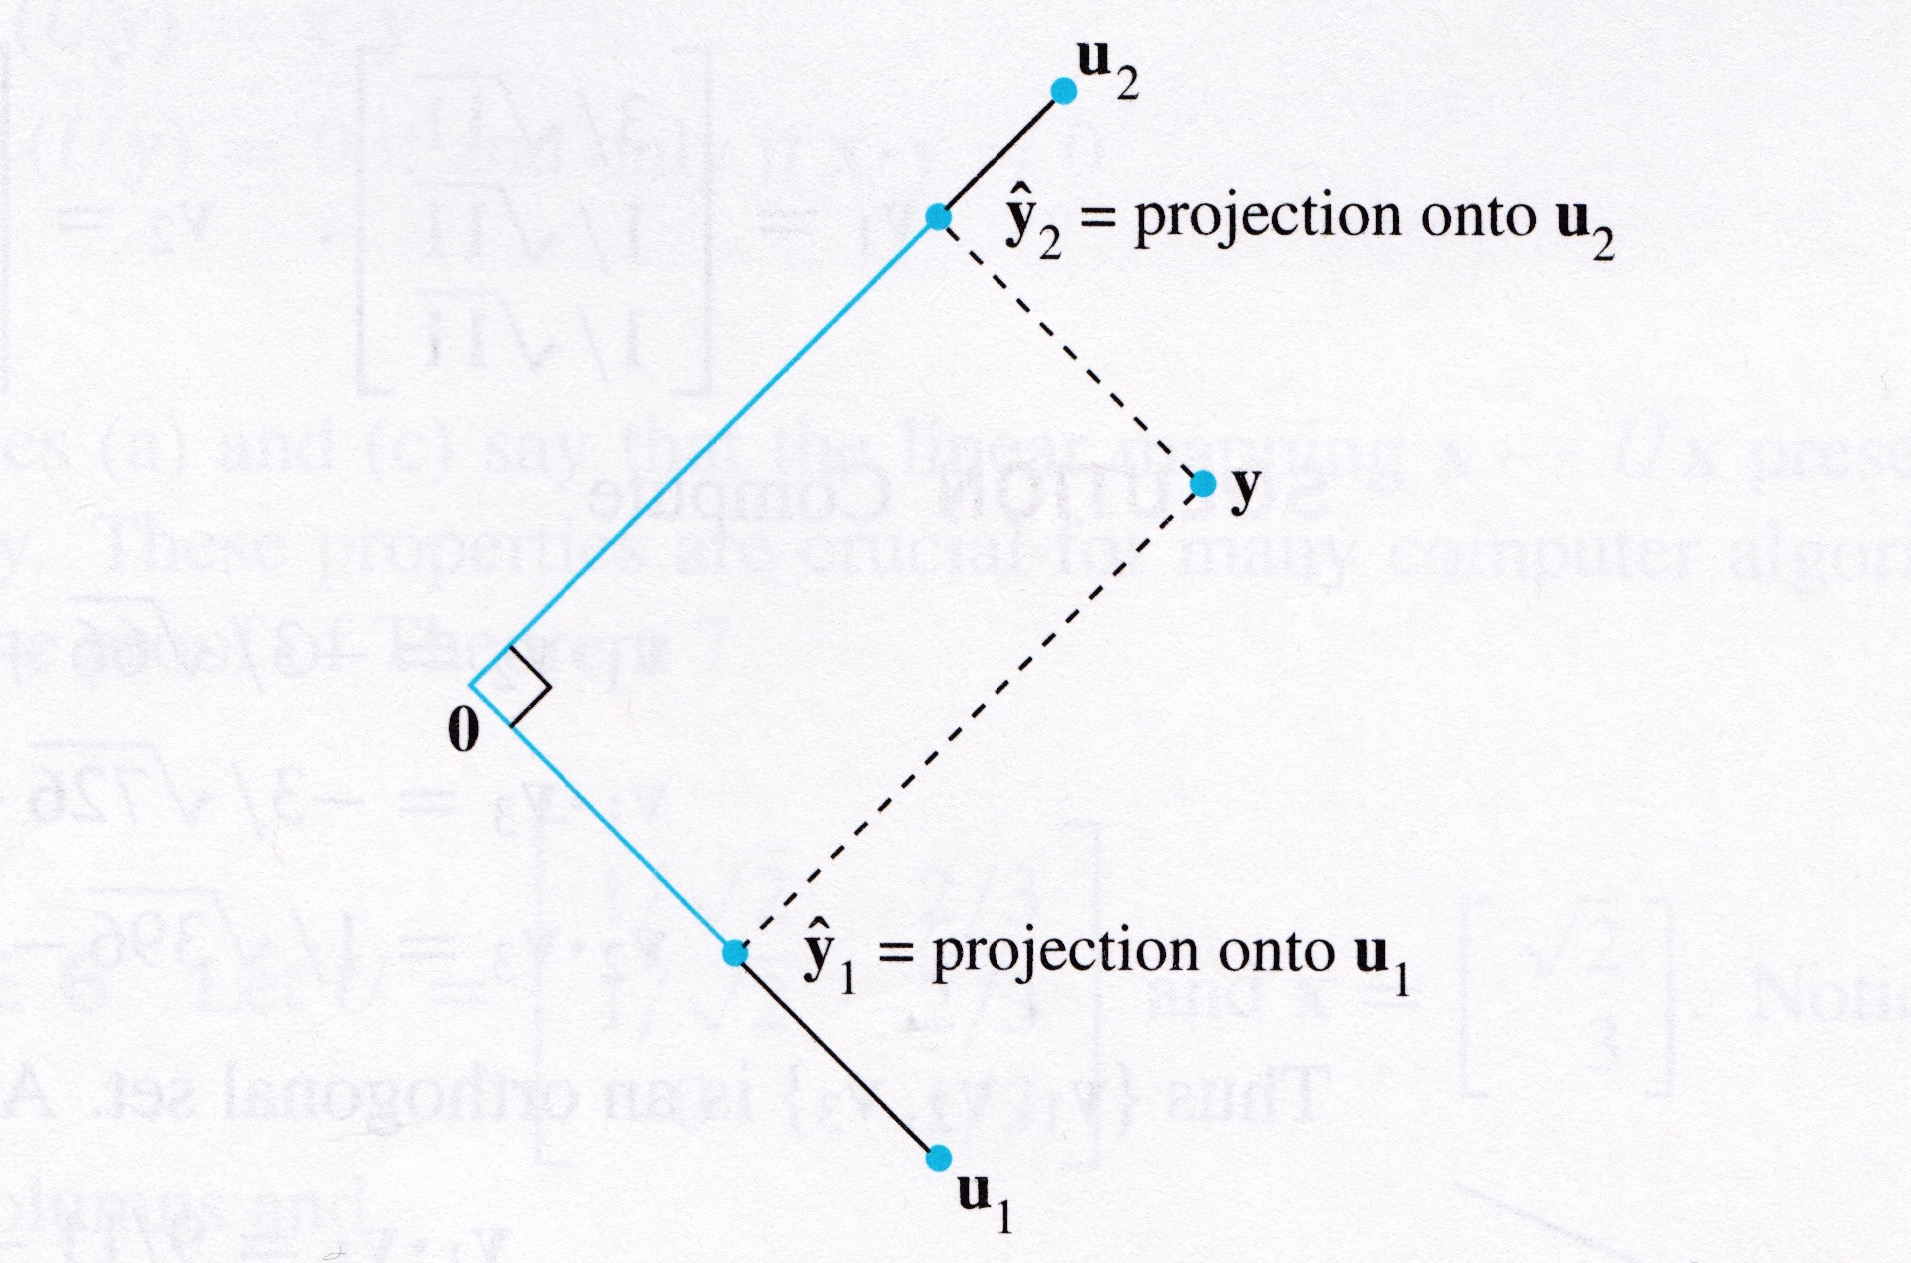

In [8]:
# image credit: Lay 4th edition figure 4 in Ch 6.2
display(Image("images/Lay-fig-6-2-4.jpg", width=600))

``` {toggle}
Question Time! Q21.3
```

## Orthonormal Sets

A set $\{\mathbf{u}_1,\dots,\mathbf{u}_p\}$ is an __orthonormal set__ if it is an orthogonal set of __unit__ vectors.

If $W$ is the subspace spanned by such as a set, then  $\{\mathbf{u}_1,\dots,\mathbf{u}_p\}$ is an __orthonormal basis__ for $W$ since the set is automatically linearly independent.

The simplest example of an orthonormal set is the standard basis $\{\mathbf{e}_1, \dots,\mathbf{e}_n\}$ for $\mathbb{R}^n$.  Any nonempty subset of $\{\mathbf{e}_1,\dots,\mathbf{e}_n\}$ is orthonormal as well.

Pro tip: keep the terms clear in your head: 

* __orthogonal__ is (just) perpendicular, while 
* __orthonormal__ is perpendicular _and_ unit length.   

(You can see the word "normalized" inside "orthonormal").

Matrices with orthonormal columns are particularly important.

__Theorem.__ A $m\times n$ matrix $U$ has orthonormal columns if and only if $U^TU = I$.

__Proof.__  Let us suppose that $U$ has only three columns which are each vectors in $\mathbb{R}^m$ (but the proof will generalize to $n$ columns).  

Let $U = [\mathbf{u}_1\;\mathbf{u}_2\;\mathbf{u}_3].$   Then:

$$U^TU = \begin{bmatrix}\mathbf{u}_1^T\\\mathbf{u}_2^T\\\mathbf{u}_3^T\end{bmatrix}\begin{bmatrix}\mathbf{u}_1&\mathbf{u}_2&\mathbf{u}_3\end{bmatrix}$$

$$ = \begin{bmatrix}
\mathbf{u}_1^T\mathbf{u}_1&\mathbf{u}_1^T\mathbf{u}_2&\mathbf{u}_1^T\mathbf{u}_3\\
\mathbf{u}_2^T\mathbf{u}_1&\mathbf{u}_2^T\mathbf{u}_2&\mathbf{u}_2^T\mathbf{u}_3\\
\mathbf{u}_3^T\mathbf{u}_1&\mathbf{u}_3^T\mathbf{u}_2&\mathbf{u}_3^T\mathbf{u}_3
\end{bmatrix}$$

The columns of $U$ are orthogonal if and only if

$$\mathbf{u}_1^T\mathbf{u}_2 = \mathbf{u}_2^T\mathbf{u}_1 = 0,\;\; \mathbf{u}_1^T\mathbf{u}_3 = \mathbf{u}_3^T\mathbf{u}_1 = 0,\;\; \mathbf{u}_2^T\mathbf{u}_3 = \mathbf{u}_3^T\mathbf{u}_2 = 0$$

The columns of $U$ all have unit length if and only if

$$\mathbf{u}_1^T\mathbf{u}_1 = 1,\;\;\mathbf{u}_2^T\mathbf{u}_2 = 1,\;\;\mathbf{u}_3^T\mathbf{u}_3 = 1.$$

So $U^TU = I.$

__Theorem.__  Let $U$ by an $m\times n$ matrix with orthonormal columns, and let $\mathbf{x}$ and $\mathbf{y}$ be in $\mathbb{R}^n.$  Then:

1. $\Vert U\mathbf{x}\Vert = \Vert\mathbf{x}\Vert.$
2. $(U\mathbf{x})^T(U\mathbf{y}) = \mathbf{x}^T\mathbf{y}.$
3. $(U\mathbf{x})^T(U\mathbf{y}) = 0\;\mbox{if and only if}\; \mathbf{x}^T\mathbf{y} = 0.$

Properties 1. and 3. say that the linear mapping $\mathbf{x}\mapsto U\mathbf{x}$ preserves lengths and orthogonality.  

So, viewed as a linear operator, an orthonormal matrix is very special: the lengths of vectors, and therefore the __distances between points__ is not changed by the action of $U$.

__Example.__  Let $U = \begin{bmatrix}1/\sqrt{2}&2/3\\1/\sqrt{2}&-2/3\\0&1/3\end{bmatrix}$ and $\mathbf{x} = \begin{bmatrix}\sqrt{2}\\3\end{bmatrix}.$  Notice that $U$ has orthonormal columns, and

$$U^TU = \begin{bmatrix}1/\sqrt{2}&1/\sqrt{2}&0\\2/3&-2/3&1/3\end{bmatrix}\begin{bmatrix}1/\sqrt{2}&2/3\\1/\sqrt{2}&-2/3\\0&1/3\end{bmatrix} = \begin{bmatrix}1&0\\0&1\end{bmatrix}.$$

Let's verify that $\Vert Ux\Vert = \Vert x\Vert.$

$$U\mathbf{x} = \begin{bmatrix}1/\sqrt{2}&2/3\\1/\sqrt{2}&-2/3\\0&1/3\end{bmatrix}\begin{bmatrix}\sqrt{2}\\3\end{bmatrix} = \begin{bmatrix}3\\-1\\1\end{bmatrix}$$

$$\Vert U\mathbf{x}\Vert = \sqrt{9 + 1 + 1} = \sqrt{11}.$$

$$\Vert\mathbf{x}\Vert = \sqrt{2+9}= \sqrt{11}.$$

__Orthonormal Square Matrices.__  Consider the case when $U$ is square, and has orthonormal columns.

Then the fact that $U^TU = I$ implies that $U^{-1} = U^T.$  

Then $U$ is called an __orthogonal__ matrix.  

(Note that this terminology could be confusing; the columns of $U$ are not just orthogonal but actually orthonormal.)